In [ ]:
import os
import re
import glob, random
import cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

vid_path = sorted(glob.glob('/content/drive/My Drive/lane_detection/videoplayback.mp4'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##read frames from a video and load them into col_images2

myFrameNumber = 50
cap = cv2.VideoCapture('/content/drive/My Drive/lane_detection/videoplayback.mp4')

# get total number of frames
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

# check for valid frame number
if myFrameNumber >= 0 & myFrameNumber <= totalFrames:
    # set frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES,myFrameNumber)
col_images2=[]
while True:
    ret, frame = cap.read()
    # print(ret)
    if (ret):
      # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      # frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
      frame = cv2.resize(frame, (128, 128))
      col_images2.append(frame)
      # plt.figure(figsize=(10,10))
      # plt.imshow(frame[:,:,0], cmap= "gray")
      # plt.show()
    else:
      break
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [ ]:
# reading frames from a folder of frames images and load them into col_images2
col_frames = os.listdir('/content/drive/My Drive/lane_detection/frames/')
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# load frames
col_images2=[]
for i in tqdm_notebook(col_frames):
    img = cv2.imread('/content/drive/My Drive/lane_detection/frames/'+i)
    col_images2.append(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


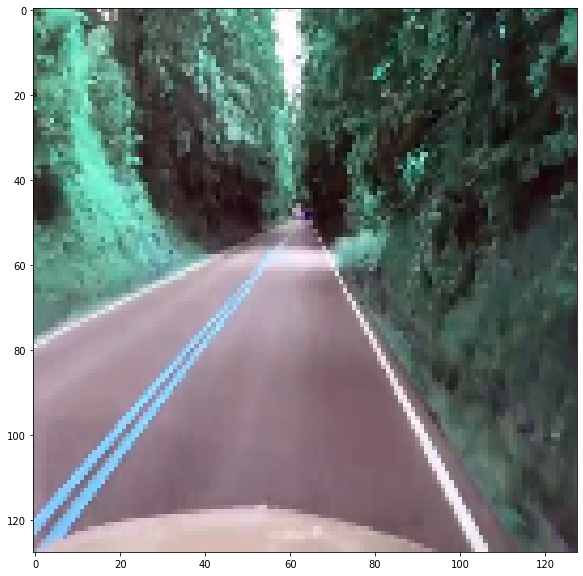

In [ ]:
# specify frame index to view and test on
idx = 457

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(col_images2[idx][:,:])
plt.show()

In [ ]:
##defining region of interest


# create a zero array
stencil = np.zeros_like(col_images2[idx][:,:,0])

# specify coordinates of the polygon
polygon = np.array([[50,270], [220,160], [440,160], [550,270]])
polygon = np.array([[10,110],  [45,65], [95,60],[110,110]])

# fill polygon with ones
cv2.fillConvexPoly(stencil, polygon, 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(128, 128)


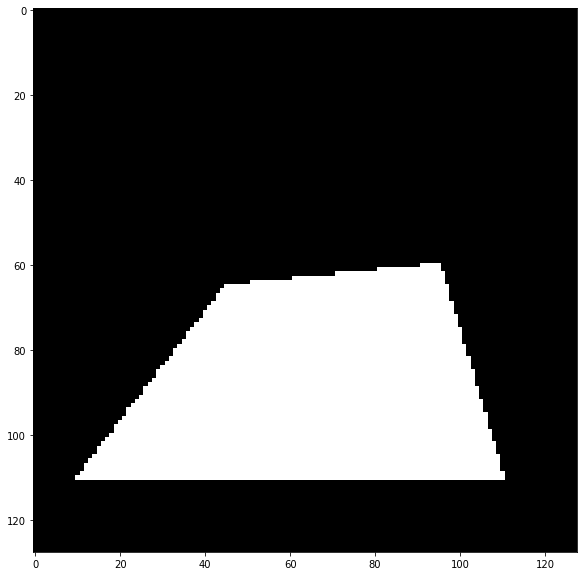

In [ ]:

# plot polygon
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
print(stencil.shape)
plt.show()

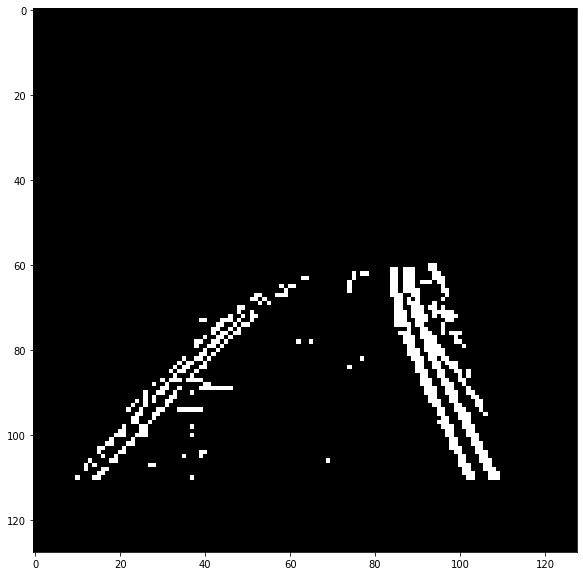

In [ ]:


# apply image thresholding
img = col_images2[1292][:,:,0]
thresh = cv2.adaptiveThreshold(img, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 7, 5)
## using cv2.ADAPTIVE_THRESH_GAUSSIAN_C to find relative changes in colour within each region regardless of general brightness of the image 


# plot image
thresh = cv2.bitwise_and(thresh, thresh, mask=stencil)

plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()

[[[ 85  61 108 110]]

 [[ 15 110  54  68]]

 [[ 84  67 103 110]]

 [[ 15 103  49  72]]

 [[ 85  73 102 110]]

 [[ 84  61 105 106]]

 [[ 87  62 109 110]]]


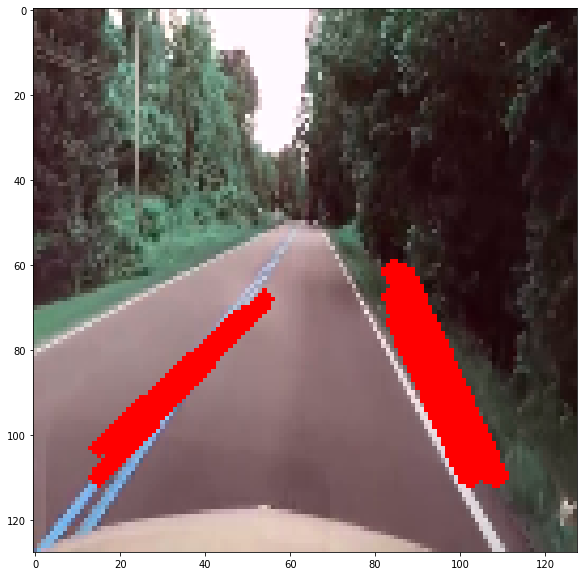

In [ ]:

lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)

# create a copy of the original frame
dmy = col_images2[98][:,:].copy()
print (lines)
# draw all Hough lines
for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)


##draw first generated line on each side that does not appear horizontal
##okay results
# drawn_slopes=[]
# # draw Hough lines
# for line in lines:
#   draw=True
#   x1, y1, x2, y2 = line[0]
#   line_slope = (y2-y1)/(x2-x1)
#   print(line_slope)
#   for s in drawn_slopes:
#       if ((s>0 and line_slope>0) or (s<0 and line_slope<0)):
#         print("too close")
#         draw=False
#   if abs(line_slope) >= 0.3 and draw:
#     cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)
#     drawn_slopes.append(line_slope)

##draw line with biggest slope on each side
##not very good results specially with a wide area of interest
# left_lane=[0, 0, 1, 0]
# right_lane=[0, 0, 1, 0]
# for line in lines:
#   x1, y1, x2, y2 = line[0]
#   left_slope=(left_lane[3]-left_lane[1])/(left_lane[2]-left_lane[0])
#   right_slope=(right_lane[3]-right_lane[1])/(right_lane[2]-right_lane[0])
#   line_slope = (y2-y1)/(x2-x1)
#   if line_slope>=0:
#     if abs(line_slope)>abs(left_slope):
#       left_lane=line[0]
#   else:
#     if abs(line_slope)>abs(right_slope):
#       right_lane=line[0]

# cv2.line(dmy, (left_lane[0], left_lane[1]), (left_lane[2], left_lane[3]), (255, 0, 0), 3)
# cv2.line(dmy, (right_lane[0], right_lane[1]), (right_lane[2], right_lane[3]), (255, 0, 0), 3)


# plot frame
plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()

[[[ 85  61 108 110]]

 [[ 15 110  54  68]]

 [[ 84  67 103 110]]

 [[ 15 103  49  72]]

 [[ 85  73 102 110]]

 [[ 84  61 105 106]]

 [[ 87  62 109 110]]]
[15, 106, 51, 70]
[85, 64, 105, 109]


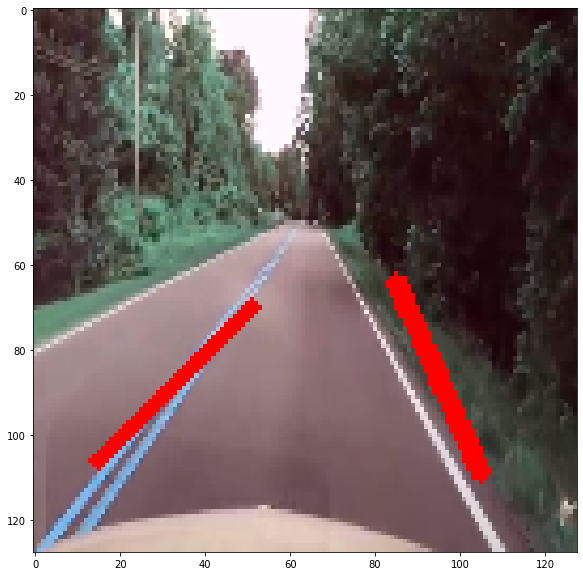

In [ ]:

lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)

# create a copy of the original frame
dmy = col_images2[98][:,:].copy()
print (lines)
# draw Hough lines
def slope(lin):
  x1, y1, x2, y2 = lin[0]
  line_slope = (y2-y1)/(x2-x1)
  return line_slope

#create an a array for left side and an array for right side of the lane (based on slope positive or negative)
pos_lines=[]
neg_lines=[]
lines_to_draw=[]

#divide nonhorizontal lines into positive or negative
for line in lines:
  x1, y1, x2, y2 = line[0]
  line_slope=slope(line)
  if abs(line_slope)>=0.3:
    if line_slope>0:
      pos_lines.append(line[0])
    else:
      neg_lines.append(line[0])

# a function to calculate mean coordinates for each side of the lane and return average line
def get_mean_line(line_set):
  res=[0,0,0,0]
  if len(line_set)>0:
    for lin in line_set:
      res[0]+=lin[0]
      res[1]+=lin[1]
      res[2]+=lin[2]
      res[3]+=lin[3]
    for i in range(0,4):
      res[i]=int(res[i]/len(line_set))

  return res
    

print(get_mean_line(neg_lines))
print(get_mean_line(pos_lines))

px1, py1, px2, py2 = get_mean_line(pos_lines)
nx1, ny1, nx2, ny2 = get_mean_line(neg_lines)

#draw left and right borders
cv2.line(dmy, (px1, py1), (px2, py2), (255, 0, 0), 3)
cv2.line(dmy, (nx1, ny1), (nx2, ny2), (255, 0, 0), 3)

plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()

generating houghlines based on the first valid line generated

In [ ]:

cnt = 0

for img in tqdm_notebook(col_images2):
 
  # apply image thresholding
  # ret, thresh = cv2.threshold(masked, 170, 255, cv2.THRESH_BINARY)
  thresh = cv2.adaptiveThreshold(img[:,:,0], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          cv2.THRESH_BINARY_INV, 11, 5) 
   # apply frame mask
  masked = cv2.bitwise_and(thresh, thresh, mask=stencil)
  
  # apply Hough Line Transformation
  lines = cv2.HoughLinesP(masked, 1, np.pi/180, 30, maxLineGap=200)
  dmy = img.copy()
  
  # Plot detected lines
  try:
    drawn_slopes=[]
# # draw Hough lines
#     for line in lines:
#       draw=True
#       x1, y1, x2, y2 = line[0]
#       line_slope = (y2-y1)/(x2-x1)
#       for s in drawn_slopes:
#         if (line_slope+0.09>s and line_slope-0.09<s and ((s>0 and line_slope>0) or (s<0 and line_slope<0))):
#           draw=False
#       if abs(line_slope) >= 0.3 and draw:
#         cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)
#         drawn_slopes.append(line_slope)
    left_lane=[0, 0, 1, 0]
    right_lane=[0, 0, 1, 0]
    for line in lines:
      x1, y1, x2, y2 = line[0]
      left_slope=(left_lane[3]-left_lane[1])/(left_lane[2]-left_lane[0])
      right_slope=(right_lane[3]-right_lane[1])/(right_lane[2]-right_lane[0])
      line_slope = (y2-y1)/(x2-x1)
      if line_slope>=0:
        if abs(line_slope)>abs(left_slope):
          left_lane=line[0]
      else:
        if abs(line_slope)>abs(right_slope):
          right_lane=line[0]

    cv2.line(dmy, (left_lane[0], left_lane[1]), (left_lane[2], left_lane[3]), (255, 0, 0), 3)
    cv2.line(dmy, (right_lane[0], right_lane[1]), (right_lane[2], right_lane[3]), (255, 0, 0), 3)   
        
  
    cv2.imwrite('/content/drive/My Drive/lane_detection/detected_test_method3/'+str(cnt)+'.png',dmy)
  
  except TypeError: 
    cv2.imwrite('/content/drive/My Drive/lane_detection/detected_test_method3/'+str(cnt)+'.png',img)

  cnt+= 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in int_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in int_scalars


KeyboardInterrupt: ignored

generating houghlines for all frames using averaging method

In [ ]:

cnt = 0

for img in tqdm_notebook(col_images2):
 
  # apply image thresholding
  # ret, thresh = cv2.threshold(masked, 170, 255, cv2.THRESH_BINARY)
  thresh = cv2.adaptiveThreshold(img[:,:,0], 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          cv2.THRESH_BINARY_INV, 7, 5) 
   # apply frame mask
  masked = cv2.bitwise_and(thresh, thresh, mask=stencil)
  
  # apply Hough Line Transformation
  lines = cv2.HoughLinesP(masked, 1, np.pi/180, 30, maxLineGap=200)
  dmy = img.copy()
  
  ##below line used to generate frames with only border drawn  (commment previous line)
  # dmy = np.zeros(shape=[128, 128, 1], dtype=np.uint8)


  # Plot detected lines
  try:
    
    pos_lines=[]
    neg_lines=[]
    lines_to_draw=[]
    for line in lines:
      x1, y1, x2, y2 = line[0]
      line_slope=slope(line)
      if abs(line_slope)>=0.3:
        if line_slope>0:
          pos_lines.append(line[0])
        else:
          neg_lines.append(line[0])

    

    px1, py1, px2, py2 = get_mean_line(pos_lines)
    nx1, ny1, nx2, ny2 = get_mean_line(neg_lines)

    cv2.line(dmy, (px1, py1), (px2, py2), (255, 0, 0), 3)
    cv2.line(dmy, (nx1, ny1), (nx2, ny2), (255, 0, 0), 3)

  
    cv2.imwrite('/content/drive/My Drive/lane_detection/detected_test_averageing_resized_blank/'+str(cnt)+'.png',dmy)
  
  except TypeError: 
    cv2.imwrite('/content/drive/My Drive/lane_detection/detected_test_averageing_resized_blank/'+str(cnt)+'.png',img)

  cnt+= 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


**converting generated frames to video**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


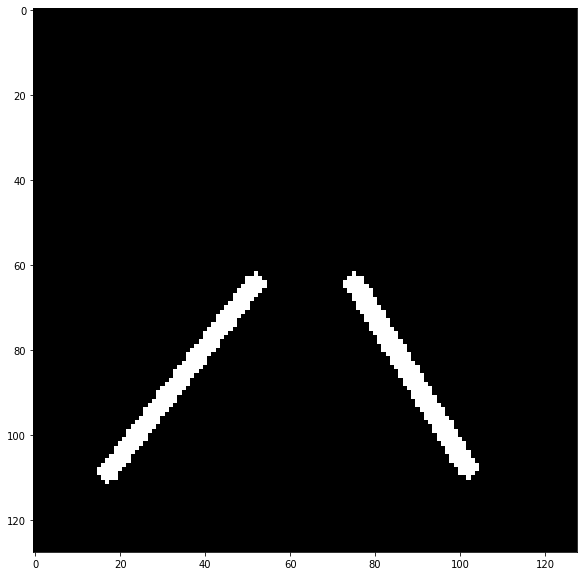

In [ ]:

# input frames path
pathIn= '/content/drive/My Drive/lane_detection/detected_test_averageing_resized_blank/'

# output path to save the video
pathOut = '/content/drive/My Drive/lane_detection/roads_test_averaging_resized_blank.mp4'

# specify frames per second
fps = 30.0


from os.path import isfile, join

# get file names of the frames
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_list = []

for i in tqdm_notebook(range(len(files))):
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_list.append(img)

plt.figure(figsize=(10,10))
plt.imshow(frame_list[0], cmap= "gray")
plt.show()    
# write the video
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_list)):
    # writing to a image array
    out.write(frame_list[i])

out.release()

refs:

https://www.analyticsvidhya.com/blog/2020/05/tutorial-real-time-lane-detection-opencv/

https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-2-adaptive-thresholding/#:~:text=Adaptive%20thresholding%20is%20the%20method%20where%20the%20threshold,Syntax%3A%20cv2.adaptiveThreshold%20%28source%2C%20maxVal%2C%20adaptiveMethod%2C%20thresholdType%2C%20blocksize%2C%20constant%29
